In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [3]:
customer_df = pd.read_csv('customers.csv')

In [4]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [5]:
customer_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [6]:
customer_df.shape

(10695, 11)

In [7]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [8]:
customer_df_cleaned = customer_df.dropna(axis=0)

In [9]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
customer_df_cleaned.shape

(8819, 11)

In [11]:
customer_df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [12]:
customer_df_cleaned['Gender'].unique()
customer_df_cleaned['Ever_Married'].unique()
customer_df_cleaned['Graduated'].unique()
customer_df_cleaned['Profession'].unique()
customer_df_cleaned['Spending_Score'].unique()
customer_df_cleaned['Var_1'].unique()
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [13]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]

In [14]:
enc = OrdinalEncoder(categories=categories_list)

In [15]:
customers_1 = customer_df_cleaned.copy()

In [16]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [17]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [18]:
le = LabelEncoder()

In [19]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [20]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [21]:
customers_1 = customers_1.drop('ID',axis=1)

In [22]:
customers_1 = customers_1.drop('Var_1',axis=1)

In [23]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [24]:
corr = customers_1.corr()

In [25]:
corr

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
Gender,1.000000,-0.112218,-0.013429,0.051309,-0.196857,0.055137,-0.066841,-0.064042,-0.022386
Ever_Married,-0.112218,1.000000,0.570625,0.203280,0.247343,-0.099169,0.613224,-0.087020,-0.169465
Age,-0.013429,0.570625,1.000000,0.247272,0.173721,-0.187907,0.437695,-0.282495,-0.187251
Graduated,0.051309,0.203280,0.247272,1.000000,0.064754,0.038245,0.110356,-0.245660,-0.139049
Profession,-0.196857,0.247343,0.173721,0.064754,1.000000,0.032277,0.243190,-0.049884,-0.135872
Work_Experience,0.055137,-0.099169,-0.187907,0.038245,0.032277,1.000000,-0.077981,-0.070434,-0.000607
Spending_Score,-0.066841,0.613224,0.437695,0.110356,0.243190,-0.077981,1.000000,0.092258,-0.082819
Family_Size,-0.064042,-0.087020,-0.282495,-0.245660,-0.049884,-0.070434,0.092258,1.000000,0.150795
Segmentation,-0.022386,-0.169465,-0.187251,-0.139049,-0.135872,-0.000607,-0.082819,0.150795,1.000000


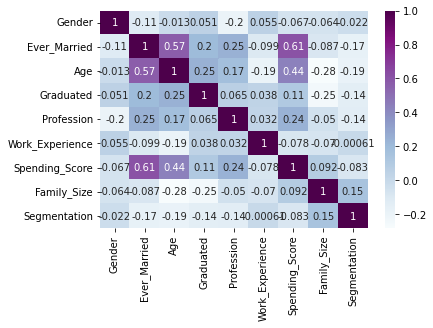

In [26]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)

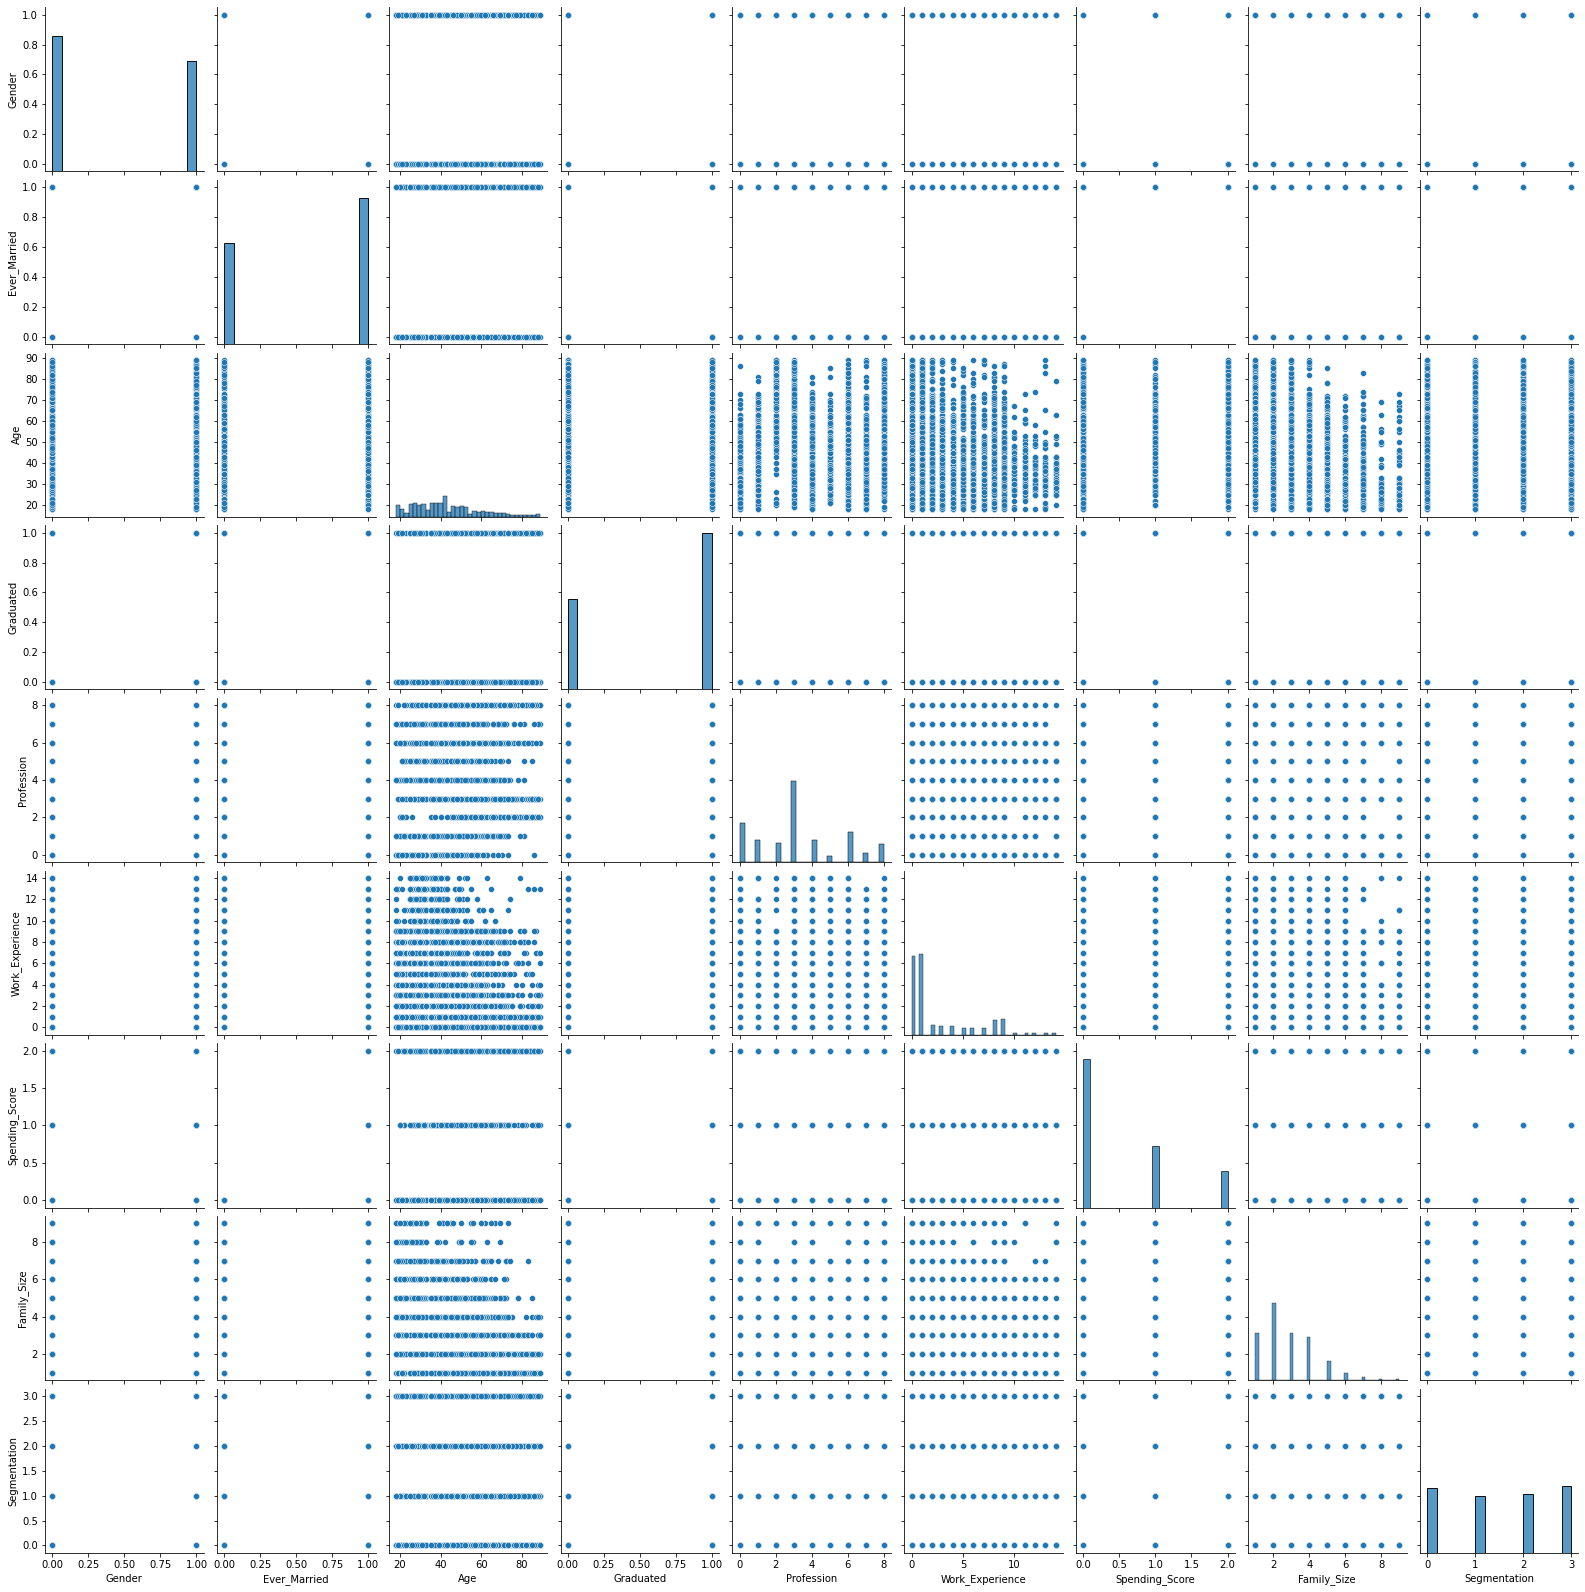

In [27]:
sns.pairplot(customers_1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


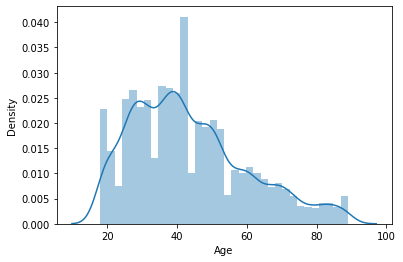

In [28]:
sns.distplot(customers_1['Age'])

In [29]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


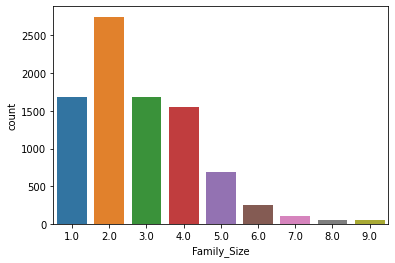

In [30]:
sns.countplot(customers_1['Family_Size'])

In [31]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

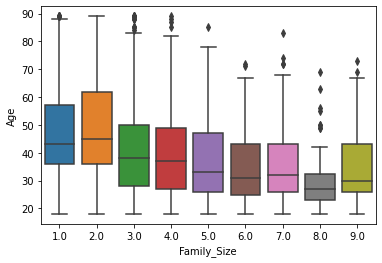

In [32]:
sns.boxplot(x='Family_Size',y='Age',data=customers_1)

In [33]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

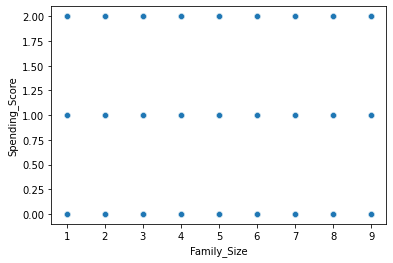

In [34]:
sns.scatterplot(x='Family_Size',y='Spending_Score',data=customers_1)

In [35]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

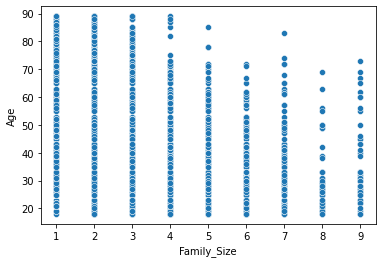

In [36]:
sns.scatterplot(x='Family_Size',y='Age',data=customers_1)

In [37]:
customers_1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [38]:
customers_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [39]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
y1 = customers_1[['Segmentation']].values
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)
y1.shape
y = one_hot_enc.transform(y1).toarray()
y.shape
y1[0]
y[0]
X.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)
X_train[0]
X_train.shape
scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:,2].reshape(-1,1))
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [40]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [41]:
ai_brain = Sequential([
    Dense(8,input_shape=(8,)),
    Dense(10,activation='relu'),
    Dense(12,activation='relu'),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
 
])

Epoch 1/2000
24/24 [==============================] - 1s 15ms/step - loss: 1.3615 - accuracy: 0.3267 - val_loss: 1.3336 - val_accuracy: 0.3679
Epoch 2/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.3014 - accuracy: 0.3871 - val_loss: 1.2903 - val_accuracy: 0.4033
Epoch 3/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2743 - accuracy: 0.4106 - val_loss: 1.2837 - val_accuracy: 0.4040
Epoch 4/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2620 - accuracy: 0.4218 - val_loss: 1.2714 - val_accuracy: 0.4177
Epoch 5/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2520 - accuracy: 0.4286 - val_loss: 1.2634 - val_accuracy: 0.4294
Epoch 6/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2430 - accuracy: 0.4323 - val_loss: 1.2570 - val_accuracy: 0.4294
Epoch 7/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2419 - accuracy: 0.4320 - val_loss: 1.2531 - val_accuracy: 0.4322
Epoch

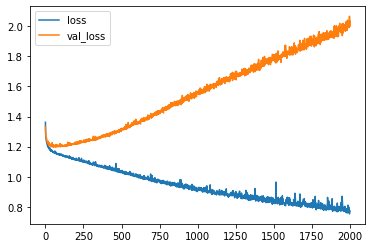

In [42]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )
metrics = pd.DataFrame(ai_brain.history.history)
metrics.head()
metrics[['loss','val_loss']].plot()

In [43]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)
x_test_predictions.shape
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shape
print(confusion_matrix(y_test_truevalue,x_test_predictions))
print(classification_report(y_test_truevalue,x_test_predictions))

[[326 118 156 157]
 [209 137 247  93]
 [139 100 363  84]
 [192  68 111 411]]
              precision    recall  f1-score   support

           0       0.38      0.43      0.40       757
           1       0.32      0.20      0.25       686
           2       0.41      0.53      0.46       686
           3       0.55      0.53      0.54       782

    accuracy                           0.42      2911
   macro avg       0.42      0.42      0.41      2911
weighted avg       0.42      0.42      0.42      2911



In [44]:
ai_brain.save('customer_classification_model.h5')

In [45]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

In [46]:
ai_brain = load_model('customer_classification_model.h5')

In [47]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

In [48]:
print(x_single_prediction)

[2]


In [49]:
print(le.inverse_transform(x_single_prediction))

['C']
